— Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [22]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [27]:
with open('tom_2.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [28]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}

In [29]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [30]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [31]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [32]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

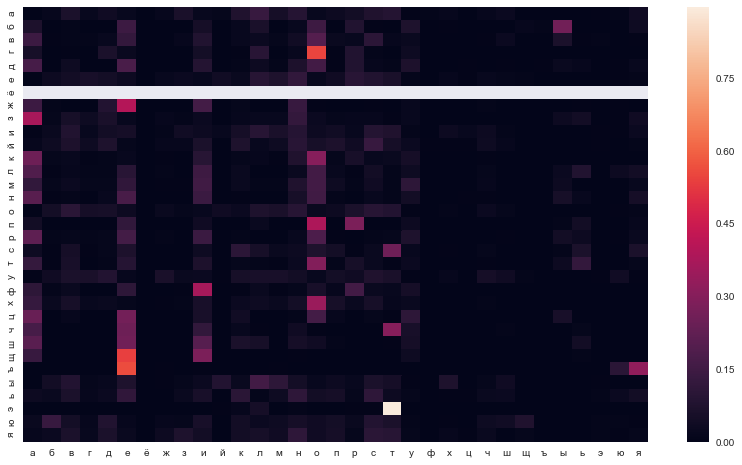

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

#### вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [37]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for c_1 in RUS:
    for c_2 in RUS:
        proba = prior * probabilities[start, POS[c_1]] *probabilities[POS[c_1], POS[c_2]]* probabilities[POS[c_2], end]
        if proba > 0:
            print(''.join(['п', c_1, c_2, 'р']), proba)

паар 1.9269773591479655e-07
пабр 1.8134311572834207e-06
павр 1.7334466113978882e-06
пагр 1.9817812662186533e-06
падр 3.6344808860754253e-06
паер 2.574543616233795e-06
пажр 3.3162484212580052e-09
пазр 1.2632277487663563e-06
паир 4.485428609216678e-07
пайр 5.017109536353809e-07
пакр 5.71315504756099e-06
палр 9.507438488453823e-07
памр 5.357537241505474e-07
панр 3.928079951785633e-07
паор 1.8188055687165695e-06
папр 1.1773470167619753e-05
парр 7.877925293842854e-08
паср 6.872040077826223e-07
патр 6.041667605239353e-06
паур 3.219020041927471e-07
пафр 2.095332791809028e-06
пахр 4.2353629941260596e-07
пацр 2.035089982903574e-09
пачр 6.661749867162497e-08
пашр 2.9520783336054793e-08
пащр 4.398453383152339e-09
паэр 2.468017880676323e-08
паюр 3.1788474585989603e-07
паяр 6.542054749621395e-07
пгар 9.682393018974408e-09
пгбр 4.5032231838514213e-10
пгвр 4.0959103940350167e-10
пггр 1.7153501648465637e-10
пгдр 2.11320225878741e-08
пгер 8.769454169395485e-09
пгжр 4.0445020696790313e-13
пгзр 1.2634834

#### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [41]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

боонымеск


#### Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [45]:
from hmmlearn.hmm import GaussianHMM

In [47]:
series = pd.read_csv("monthly-boston-armed-robberies-j.csv")["Count"]

In [48]:
values = series.values.reshape(-1,1)

In [49]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -739.512376545524
2 -652.7824661820221
3 -629.4670322744709
4 -593.9630465273634
5 -577.8704295424818
6 -571.3172772177154
7 -561.1297478131944


Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.


8 -559.5153629381603
9 -554.9594977291299


Fitting a model with 142 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 118 data points will result in a degenerate solution.


10 -548.5673407438115
11 -548.8793207451627


Fitting a model with 194 free scalar parameters with only 118 data points will result in a degenerate solution.


12 -544.4331402277387
13 -535.8164167349025


Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.


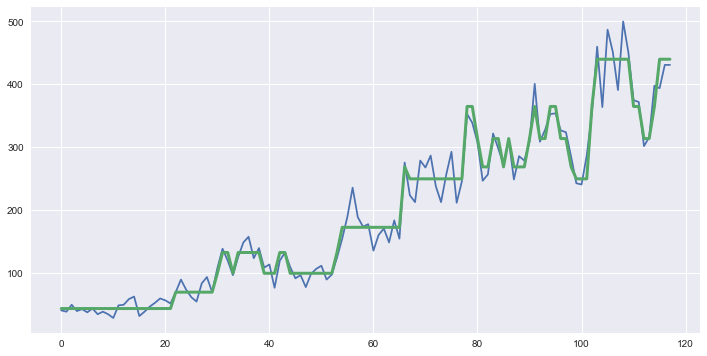

In [50]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [51]:
model.transmat_.shape

(10, 10)